In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
result=h5py.File('bbh_mass_two_component_primary_mass_ratio_powerlaw_m2min_redshift_powerlaw_result.hdf5')

In [3]:
result['posterior'].keys()

<KeysViewHDF5 ['alpha', 'beta', 'gamma', 'gaussian_mass_maximum', 'lam', 'lamb', 'ln_bf_0', 'ln_bf_1', 'ln_bf_10', 'ln_bf_100', 'ln_bf_101', 'ln_bf_102', 'ln_bf_103', 'ln_bf_104', 'ln_bf_105', 'ln_bf_106', 'ln_bf_107', 'ln_bf_108', 'ln_bf_109', 'ln_bf_11', 'ln_bf_110', 'ln_bf_111', 'ln_bf_112', 'ln_bf_113', 'ln_bf_114', 'ln_bf_115', 'ln_bf_116', 'ln_bf_117', 'ln_bf_118', 'ln_bf_119', 'ln_bf_12', 'ln_bf_120', 'ln_bf_121', 'ln_bf_122', 'ln_bf_123', 'ln_bf_124', 'ln_bf_125', 'ln_bf_126', 'ln_bf_127', 'ln_bf_128', 'ln_bf_129', 'ln_bf_13', 'ln_bf_130', 'ln_bf_131', 'ln_bf_132', 'ln_bf_133', 'ln_bf_134', 'ln_bf_135', 'ln_bf_136', 'ln_bf_137', 'ln_bf_138', 'ln_bf_139', 'ln_bf_14', 'ln_bf_140', 'ln_bf_141', 'ln_bf_142', 'ln_bf_143', 'ln_bf_144', 'ln_bf_145', 'ln_bf_146', 'ln_bf_147', 'ln_bf_148', 'ln_bf_149', 'ln_bf_15', 'ln_bf_150', 'ln_bf_151', 'ln_bf_152', 'ln_bf_153', 'ln_bf_154', 'ln_bf_155', 'ln_bf_156', 'ln_bf_157', 'ln_bf_16', 'ln_bf_17', 'ln_bf_18', 'ln_bf_19', 'ln_bf_2', 'ln_bf_20', 

In [4]:
important_result = [result['posterior']['alpha'], result['posterior']['beta'], result['posterior']['gamma'],\
                    result['posterior']['mmin'], result['posterior']['mmax']]

In [5]:
corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=['alpha','beta','gamma', 'mmin', 'mmax', 'zeta'],
)

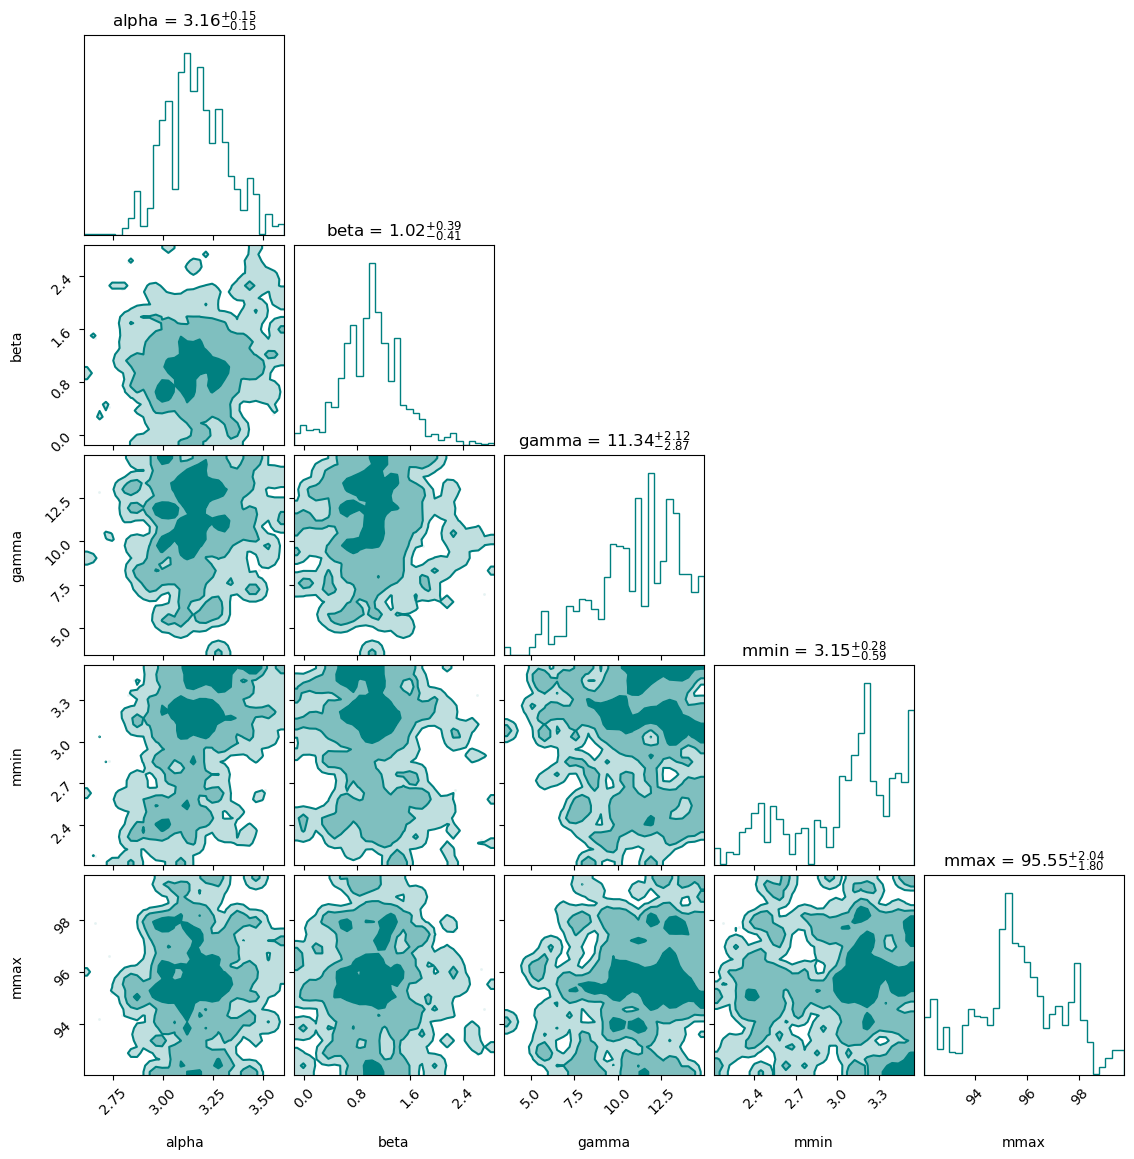

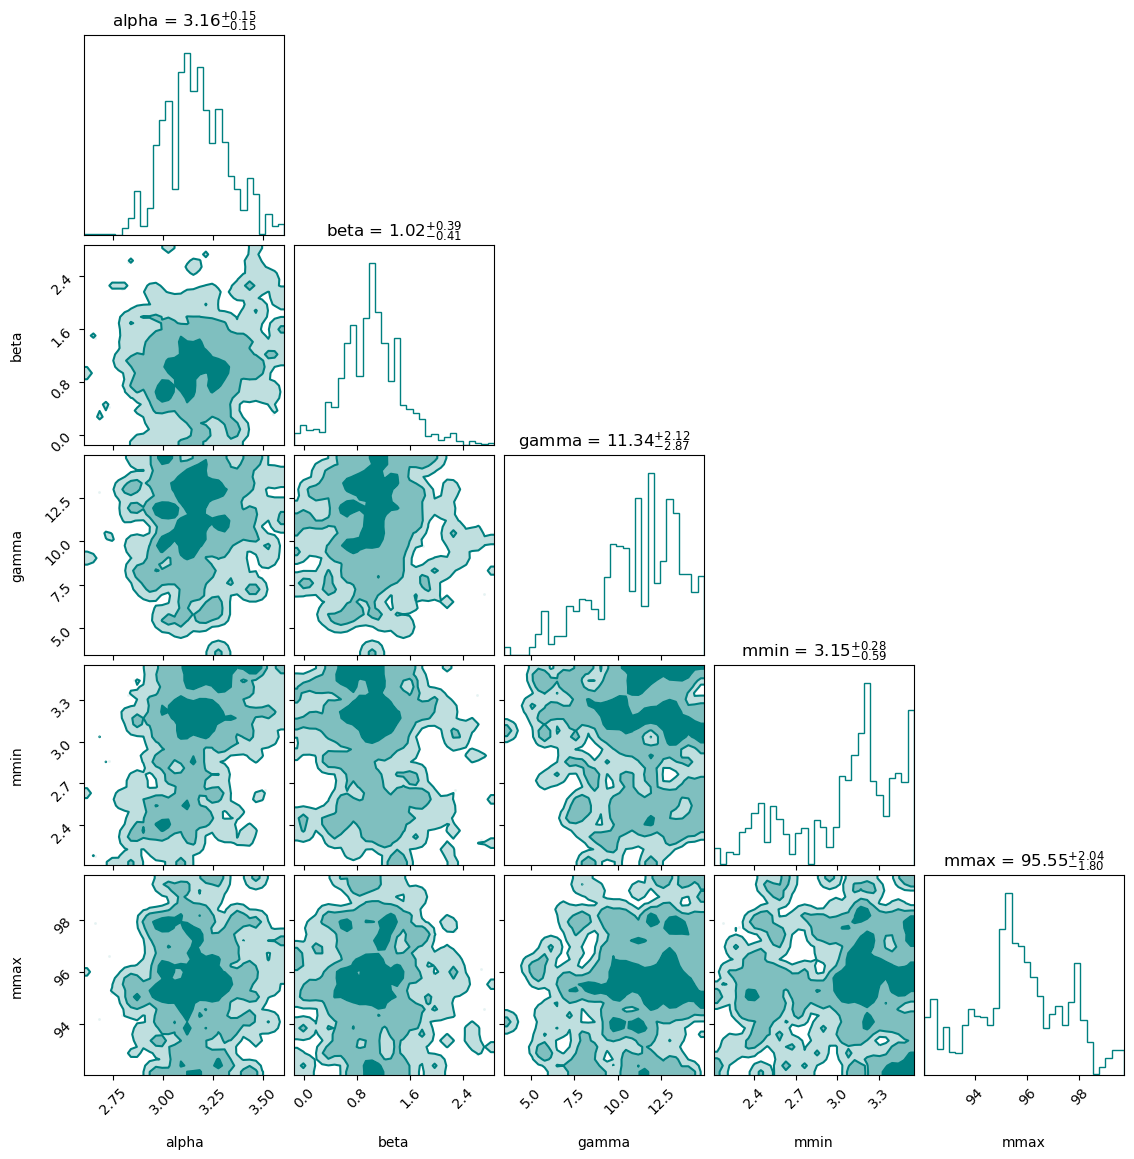

In [6]:
corner.corner(np.swapaxes(important_result, 0,1), **corner_kwargs)

(array([  6.,  23.,  65., 103., 107., 223., 248., 257., 294., 167.]),
 array([ 3.44123198,  4.59392383,  5.74661567,  6.89930751,  8.05199936,
         9.2046912 , 10.35738304, 11.51007489, 12.66276673, 13.81545857,
        14.96815042]),
 <BarContainer object of 10 artists>)

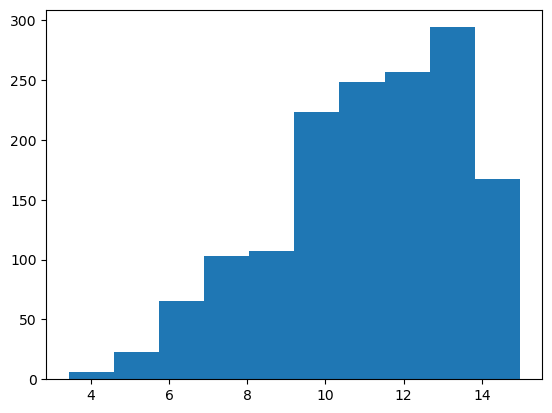

In [7]:
plt.hist(result['posterior']['gamma'])